# Demo 1: Kmean, Fuzzy C-means, MeanShift, DBSCAN

This deme we will demo code for using Kmean, Fuzzy C-means, Mean Shift and DBSCAN on the psuedo dataset as we have created on the Demo_0_psuedo_data.ipynb
-   Problem: Clustering our psuedo dataset in to cluster classes
-   Dataset: Psuedo dataset
-   Library package:
    -   Scikit-learn
    -   Scikit-Fuzzy
    -   Numpy
    -   Matplotlib

Tasks Outlines:

## 0. Task 0: Preparing a psuedo dataset
## 1. Task 1: Apply K-means to our psuedo dataset
## 2. Task 2: Apply fuzzy c-mean to our psuedo dataset
## 3. Task 3: Apply MeanShift to our psuedo dataset
## 4. Task 4: Apply DBSCAN to our psuedo dataset

# Import all packages

In [2]:
import os
import numpy as np
from numpy import unique,where
from matplotlib import pyplot as plt

from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from skfuzzy.cluster import cmeans


## 0. Task 0: Preparing a psudo dataset

In [3]:
from sklearn.datasets import make_classification
data,_ = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4,
    class_sep=2
)

## 1. Task 1: K-means

### 1.1. Getting model Kmeans

In [17]:
# Create a Kmeans with number of clusters = 3
kmeans = KMeans(n_clusters=3, 
                init='k-means++',
                max_iter=1000,
                n_init=10)

### 1.2. Training for our model (Fitting data to our model) and getting the results of model


In [18]:
# Fitting data to kmeans
kmeans.fit(data)
# Predict clusters class for each data point
y_pred = kmeans.predict(data)

### 1.3. Visual results of model

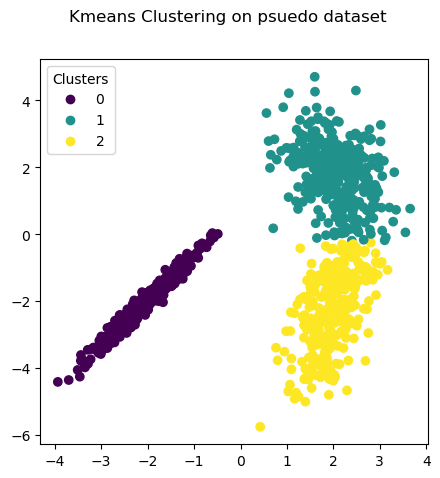

In [19]:
# Visualize results:
kmean_clusters = unique(y_pred)

fig,ax = plt.subplots(1,1,figsize = (5,5))
scatter = ax.scatter(data[:,0],data[:,1],c = y_pred)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")
fig.suptitle("Kmeans Clustering on psuedo dataset")
plt.show()

### 1.4. Without provide number of clusters

In [21]:
# Kmeans without given number of cluster
kmeans = KMeans(
                init='k-means++',
                max_iter=1000,
                n_init=10)
# Fitting data to kmeans
kmeans.fit(data)
# Predict clusters class for each data point
y_pred = kmeans.predict(data)

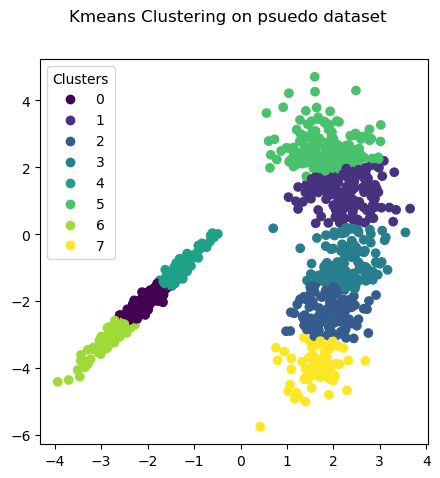

In [22]:
# Visualize results:
kmean_clusters = unique(y_pred)

fig,ax = plt.subplots(1,1,figsize = (5,5))
scatter = ax.scatter(data[:,0],data[:,1],c = y_pred)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")
fig.suptitle("Kmeans Clustering on psuedo dataset")
plt.show()

## 2. Task 2: Fuzzy C-Means

### 2.1. Getting model Fuzzy C-Means

In [23]:
# Create a Fuzzy c-means model with number of cluster equal to 3
n_clusters = 3
# Fuzzy c-means algorithm
cntr,u,u0,d,j,p,fpc = cmeans(data.T,
                             n_clusters,
                             2,
                             error = 0.005,
                             maxiter = 1000)

In [24]:
# Assign each data point to the cluster with the highest membership value
# Predict clusters class for each data point
cluster_membership = np.argmax(u,axis = 0)

### 2.2. Visual results of model

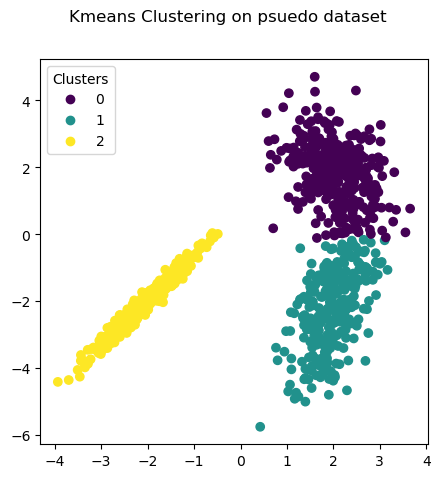

In [25]:
kmean_clusters = unique(cluster_membership)

fig,ax = plt.subplots(1,1,figsize = (5,5))
scatter = ax.scatter(data[:,0],data[:,1],c = cluster_membership)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")
fig.suptitle("Kmeans Clustering on psuedo dataset")
plt.show()

### 2.3. Without knowing about the number of clusters

We see three distinct blobs. However, what would happen if we didn't know how many clusters we should expect? Perhaps if the data were not so clearly clustered?

Scikit-Fuzzy cmeans need a number of clusters as input

Let's try clustering our data several times, with different number of clusters

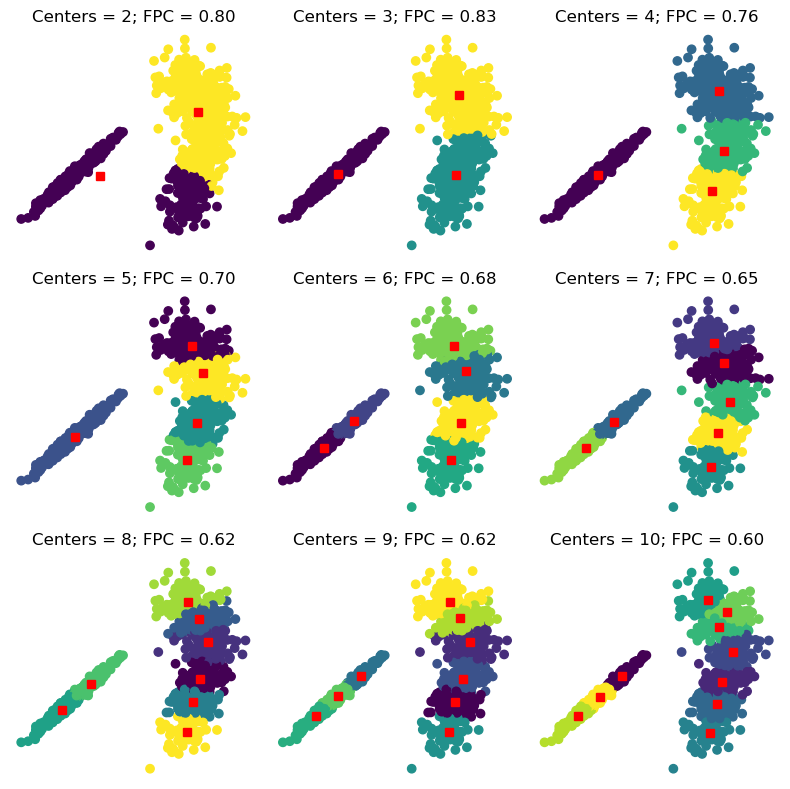

In [27]:
# Set up the loop and plot
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fpcs = []

for n_cluster, ax in enumerate(axes.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = cmeans(data.T, 
                                        n_cluster, 
                                        2, error=0.005, 
                                        maxiter=1000, 
                                        init=None)
    # Store fpc values for later
    fpcs.append(fpc)

    # Predict the cluster class for each data point
    cluster_membership = np.argmax(u, axis=0)
    # Plot results
    scatter = ax.scatter(data[:,0],data[:,1],c = cluster_membership)

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(n_cluster, fpc))
    ax.axis('off')

fig.tight_layout()

## 3. Task 3: MeanShift

### 3.1. Getting model MeanShift

In [29]:
# Create mean shift model
mean_shift = MeanShift() 

### 3.2. Training for model and getting the results of model

In [30]:
# Fitting data to mean_shift
mean_shift.fit(data)
# Predict clusters class for each data point
pred_meanshift = mean_shift.predict(data)

### 3.3. Visual results of model

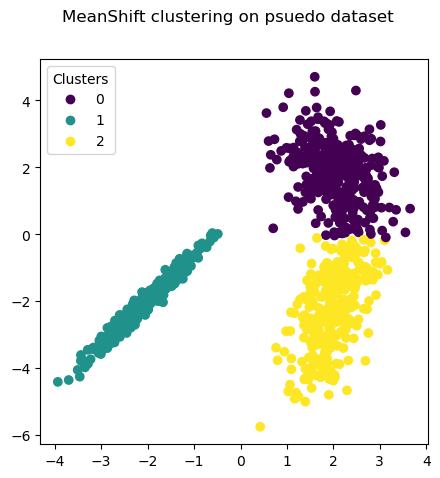

In [31]:
# Visualize results:

fig,ax = plt.subplots(1,1,figsize = (5,5))
scatter = ax.scatter(data[:,0],data[:,1],c = pred_meanshift)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")
fig.suptitle("MeanShift clustering on psuedo dataset")
plt.show()

# Task 4: DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
model_DBSCAN = DBSCAN(eps=0.25,min_samples=9) 
# Fitting data to model DBSCAN
model_DBSCAN.fit(data)
# Predict clusters class for each data point
pred_DBSCAN = model_DBSCAN.labels_

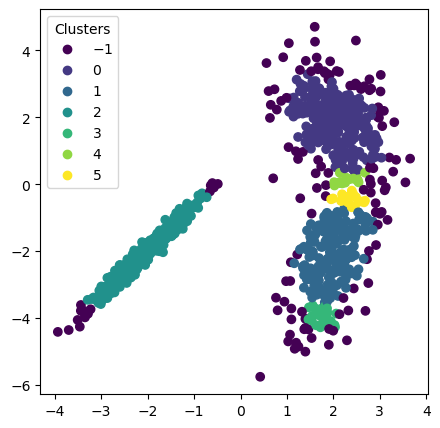

In [28]:
# Visualize results:
kmean_clusters = unique(pred_DBSCAN)

fig,ax = plt.subplots(1,1,figsize = (5,5))
scatter = ax.scatter(data[:,0],data[:,1],c = pred_DBSCAN)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")


# Task 5: Fuzzy C-means FCM


In [41]:
import skfuzzy as fuzz
import numpy as np
n_clusters = 3
# Fuzzy c-means algorithm
cntr,u,u0,d,j,p,fpc = fuzz.cluster.cmeans(data.T,n_clusters,2,error = 0.005,maxiter = 1000)
# Assign each data point to the cluster with the highest membership value
cluster_membership = np.argmax(u,axis = 0)

In [42]:
print(u)

[[0.74182998 0.03145424 0.40465071 ... 0.0267259  0.03405557 0.24158551]
 [0.08516894 0.94790993 0.49940306 ... 0.01281778 0.95196469 0.69633699]
 [0.17300108 0.02063583 0.09594623 ... 0.96045632 0.01397974 0.06207751]]


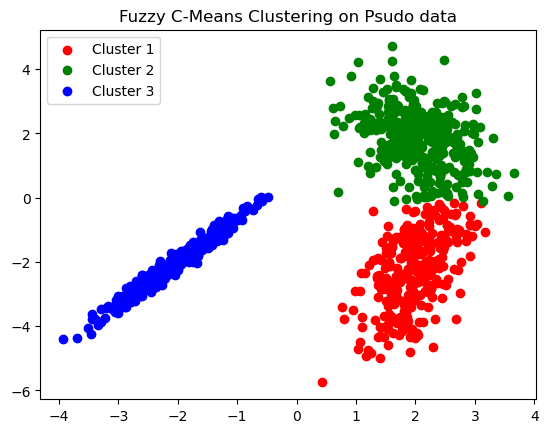

In [44]:
# Plotting the results
fig, ax = plt.subplots()
colors = ['r', 'g', 'b']
for j in range(n_clusters):
    ax.scatter(data[cluster_membership == j, 0], data[cluster_membership == j, 1],
               c=colors[j], label=f'Cluster {j + 1}', marker='o')

ax.legend()

plt.title('Fuzzy C-Means Clustering on Psudo data')
plt.show()

Above is our test data. We see three distinct blobs. However, what would happen if we didn’t know how many clusters we should expect? Perhaps if the data were not so clearly clustered?

Let’s try clustering our data several times, with between 2 and 10 clusters.

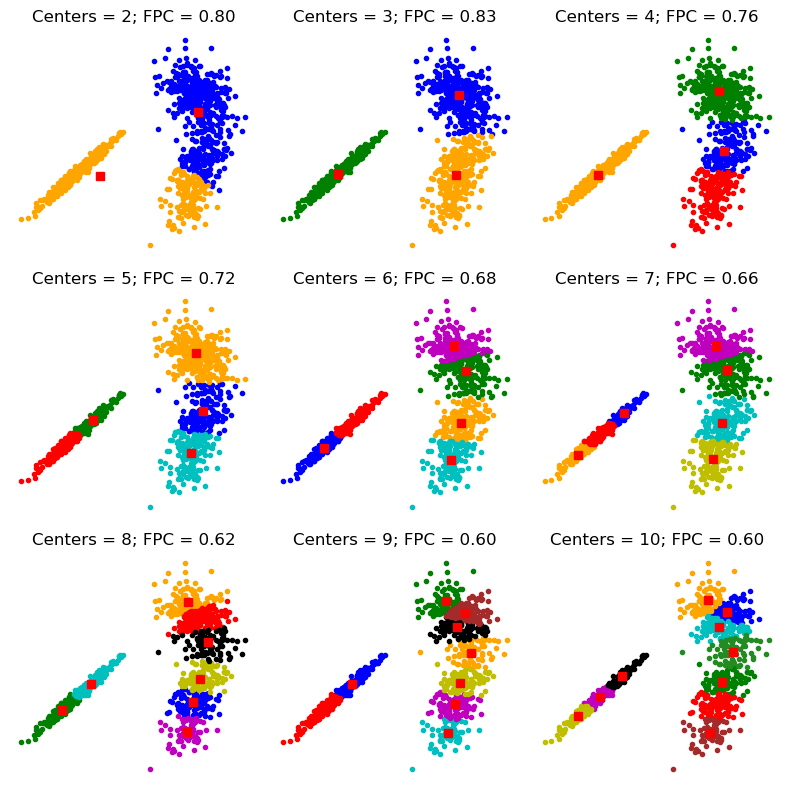

In [47]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data.T, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(data[cluster_membership == j,0],
                data[cluster_membership == j,1], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()